# Polynomial Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# Step 1: Create Sample Data
# Generate some data
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100])  # Quadratic relationship (y = x^2)

In [17]:
# Step 2: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [18]:
# Step 3: Generate Polynomial Features
degree = 2  # You can change this to explore different polynomial degrees
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train)

# Transform the test data (do not fit again)
X_test_poly = poly.transform(X_test)

In [24]:
print("X_train_poly: ", X_train_poly)
print("X_test_poly: ", X_test_poly)

X_train_poly:  [[ 8. 64.]
 [ 6. 36.]
 [ 7. 49.]
 [ 2.  4.]
 [ 1.  1.]
 [ 4. 16.]
 [ 3.  9.]]
X_test_poly:  [[ 10. 100.]
 [  5.  25.]
 [  9.  81.]]


In [19]:
# Step 4: Fit a Linear Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
# Step 5: Make Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


In [21]:
# Step 6: Evaluate the Model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)



In [22]:
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 6.514441528918873e-29
Test MSE: 3.365806528942984e-28


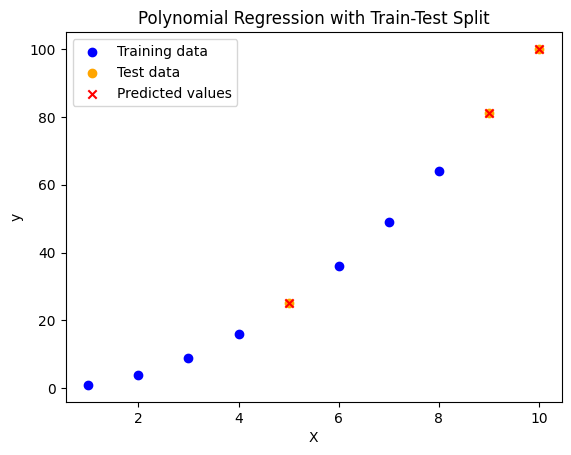

Coefficients: [-4.67116814e-16  1.00000000e+00]
Intercept: -3.552713678800501e-15


In [23]:
# Step 7: Visualize Results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted values', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Train-Test Split')
plt.legend()
plt.show()

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
